## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
import xgboost
from xgboost import XGBClassifier
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [12]:
df=pd.read_csv('iris.csv')

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [17]:
# For Null Values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna(method='ffill',inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [21]:
# Dealing with Categorical Features.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [22]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

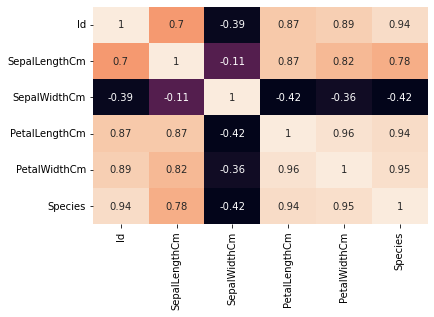

In [26]:
# Correlation Matrix
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()
# Every Feature has good correlation with target variable,so none of should be drop.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [28]:
df.std()
# Every Feature has good std.Deviation,so none of should be drop.

Id              44.022721
SepalLengthCm    0.822584
SepalWidthCm     0.430757
PetalLengthCm    1.754000
PetalWidthCm     0.759698
Species          0.821780
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

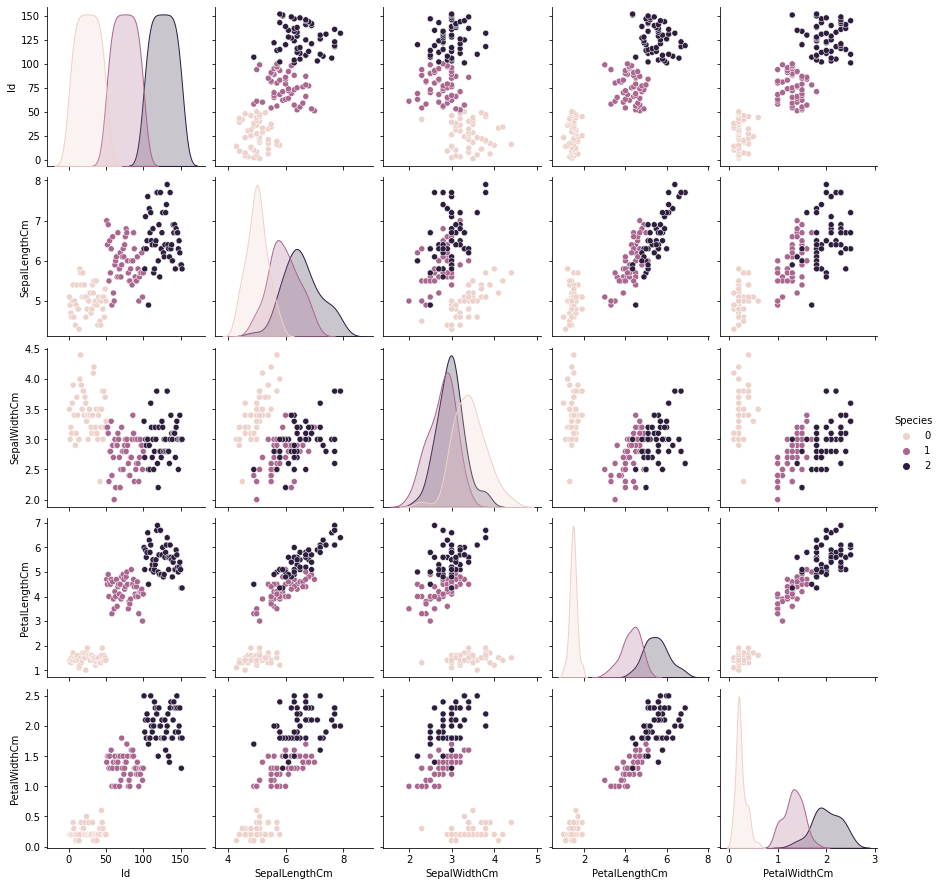

In [43]:
# Scatterplot of all variables.
sns.pairplot(df,hue="Species")
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [44]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns="Species"), df.Species, test_size=0.2, random_state=1)

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((121, 5), (31, 5), (121,), (31,))

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [47]:
from sklearn.metrics import accuracy_score

In [56]:
for i in [3,5,9]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    print(f"Accuracy when k_neightbours={i} is" , accuracy_score(y_test,y_pred))

Accuracy when k_neightbours=3 is 1.0
Accuracy when k_neightbours=5 is 1.0
Accuracy when k_neightbours=9 is 0.967741935483871


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [92]:
dict1 = {} # Dictionary for k_neighbours as keys and MSE as values
for i in range(3,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    dict1[i] = 1 - accuracy_score(y_test,y_pred)
    print(f"MSE when k_neightbours = {i} \tis" , 1 - accuracy_score(y_test,y_pred))
a = [] # list of k_neighbour where MSE is Lowest
for j,k in zip(dict1,dict1.values()):
    if k == np.min(list(dict1.values())):
        a.append(j)
        
print("\n\nThe Model(s) with lowest MSE is/are with the k_neighbour value =" ,a )

MSE when k_neightbours = 3 	is 0.0
MSE when k_neightbours = 5 	is 0.0
MSE when k_neightbours = 7 	is 0.032258064516129004
MSE when k_neightbours = 9 	is 0.032258064516129004
MSE when k_neightbours = 11 	is 0.032258064516129004
MSE when k_neightbours = 13 	is 0.032258064516129004
MSE when k_neightbours = 15 	is 0.032258064516129004
MSE when k_neightbours = 17 	is 0.032258064516129004
MSE when k_neightbours = 19 	is 0.032258064516129004


The Model(s) with lowest MSE is/are with the k_neighbour value = [3, 5]


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

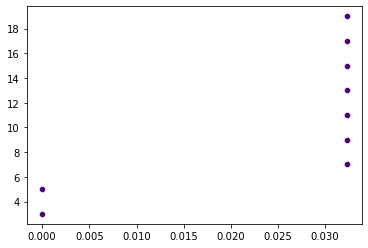

In [80]:
sns.scatterplot(dict1.values(),dict1.keys(),color="indigo")
plt.show()

# Naive Bayes

In [82]:
#Load all required library
from sklearn.naive_bayes import GaussianNB

### Question 1
#### Import Iris.csv

In [87]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.100000,3.500000,1.400000,0.200000,0
1,2,4.900000,3.000000,1.400000,0.200000,0
2,3,4.700000,3.200000,1.300000,0.200000,0
3,4,4.600000,3.100000,1.500000,0.200000,0
4,5,5.000000,3.600000,1.400000,0.200000,0


### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [ ]:
#'Species' is my dependent variables, name it y and independent set data as X

## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

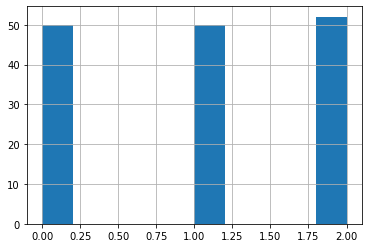

In [90]:
df.Species.hist()
plt.show()

### Plot the distribution of target variable using histogram

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

### Question 3
#### Find Correlation among all variables and give your insights 

### Question 4
#### Split data in Training and Validation in 80:20

In [100]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

In [94]:
df_features = df.drop(columns="Species")

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [102]:
df_feat = sc.fit_transform(df_features)

In [103]:
df_feat = pd.DataFrame(data=df_feat,columns=df_features.columns)

In [105]:
df_feat.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720693,-0.906750,1.040463,-1.353632,-1.325008
1,-1.697902,-1.150690,-0.124120,-1.353632,-1.325008
2,-1.675112,-1.394630,0.341713,-1.410833,-1.325008
3,-1.652321,-1.516600,0.108797,-1.296431,-1.325008
4,-1.629530,-1.028720,1.273380,-1.353632,-1.325008


### Question 6 
#### Train and Fit NaiveBayes Model

In [129]:
x_train, x_test, y_train, y_test = train_test_split(df_feat,df.Species,test_size=0.3,random_state=10)
print("x_train\t:" , x_train.shape)
print("x_test\t:" , x_test.shape)
print("y_train\t:" , y_train.shape)
print("y_test\t:" , x_test.shape)

x_train	: (106, 5)
x_test	: (46, 5)
y_train	: (106,)
y_test	: (46, 5)


In [130]:
gb = GaussianNB()
gb_model=gb.fit(x_train,y_train)

In [131]:
y_pred=gb_model.predict(x_test)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

<AxesSubplot:>

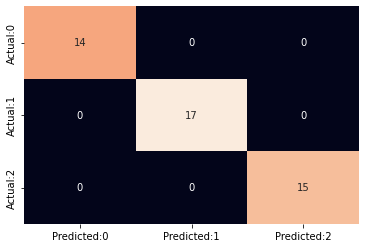

In [133]:
cm=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1','Actual:2'],columns=['Predicted:0','Predicted:1','Predicted:2'])
sns.heatmap(matrix,annot=True,fmt='d',cbar=False)